<a href="https://colab.research.google.com/github/ezradenia/EDA---Brazilian-E-Commerce-Olist/blob/main/Exploratory_Data_Analysis_Olist_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Connect Colab to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


## 2. Import Packages

In [ ]:
import os 
import sqlite3
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime as dt

## 3. Connect SQLite to Python

In [ ]:
path ="/content/gdrive/MyDrive/Data Analyst/Capstone Project /Data/2. Brazilian E-Commerce/Olist E-commerce.db"

In [ ]:
conn = sqlite3.connect(path)

cur = conn.cursor()

In [ ]:
cur.execute(""" 
              SELECT 
                  name
              FROM sqlite_master
              WHERE type='table' 
            """)
print(cur.fetchall())

[('Orders',), ('Products',), ('Customers',), ('Sellers',), ('Geolocation',)]


## 4. Data Preparation Using SQL

In [ ]:
pd.read_sql_query("""
                    SELECT * 
                    FROM Orders limit 5""",conn)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,432aaf21d85167c2c86ec9448c4e42cc,3df704f53d3f1d4818840b34ec672a9f,delivered,2018-03-01 14:14:28,2018-03-01 15:10:47,2018-03-02 21:09:20,2018-03-12 23:36:26,2018-03-21 00:00:00,1.0,72d3bf1d3a790f8874096fcf860e3eff,...,1.0,credit_card,1.0,54.36,8f39f09c22b1ceb6e3eb178d8e50bb8a,4.0,None,Gostei do produto,2018-03-13 00:00:00,2018-03-14 10:36:16
1,641fb0752bf5b5940c376b3a8bb9dc52,f5afca14dfa9dc64251cf2b45c54c363,delivered,2017-12-15 00:06:10,2017-12-15 00:14:55,2017-12-19 01:58:00,2018-01-03 15:09:32,2018-01-16 00:00:00,1.0,60184212dae4e6b0da32bf54271a8c4a,...,1.0,credit_card,10.0,386.33,ffa0d9ba2678dba5fa370295245f473d,4.0,None,"Inicialmente, pedi o cancelamento do pedido de...",2018-01-04 00:00:00,2018-01-04 18:29:06
2,b52cc4919de82b4d696a4380d10804a3,be8c14c16a4d47194ccdfe10f1fc5b1a,delivered,2018-06-13 13:47:39,2018-06-15 02:37:29,2018-06-15 14:22:00,2018-06-18 22:32:44,2018-06-26 00:00:00,1.0,7564c1759c04fc0a38f2aa84f7a370ee,...,1.0,boleto,1.0,55.02,b1dafcdfcddb6feb75222b9c1f2baad3,5.0,None,None,2018-06-19 00:00:00,2018-06-20 11:07:14
3,82bce245b1c9148f8d19a55b9ff70644,388025bec8128ff20ec1a316ed4dcf02,delivered,2017-04-20 17:15:46,2017-04-21 05:15:56,2017-04-24 09:34:13,2017-05-10 09:17:55,2017-05-12 00:00:00,1.0,a5a0e71a81ae65aa335e71c06261e260,...,1.0,boleto,1.0,267.80,fd793fea4f4a2ddcc956561144b6c04e,1.0,None,None,2017-05-11 00:00:00,2017-05-12 11:25:49
4,82bce245b1c9148f8d19a55b9ff70644,388025bec8128ff20ec1a316ed4dcf02,delivered,2017-04-20 17:15:46,2017-04-21 05:15:56,2017-04-24 09:34:13,2017-05-10 09:17:55,2017-05-12 00:00:00,2.0,a5a0e71a81ae65aa335e71c06261e260,...,1.0,boleto,1.0,267.80,fd793fea4f4a2ddcc956561144b6c04e,1.0,None,None,2017-05-11 00:00:00,2017-05-12 11:25:49


In [ ]:
df_Orders = pd.read_sql_query(""" 
                    SELECT DISTINCT
                    order_id,
                    customer_id,
                    order_status,
                    order_purchase_timestamp,
                    order_approved_at,
                    order_delivered_carrier_date,
                    order_delivered_customer_date,
                    order_estimated_delivery_date,
                    product_id,
                    order_item_id,
                    payment_type
                    FROM Orders
                    WHERE 
                    order_id IS NOT NULL AND
                    customer_id IS NOT NULL AND
                    product_id IS NOT NULL
                     """,conn)
df_Orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,order_item_id,payment_type
0,432aaf21d85167c2c86ec9448c4e42cc,3df704f53d3f1d4818840b34ec672a9f,delivered,2018-03-01 14:14:28,2018-03-01 15:10:47,2018-03-02 21:09:20,2018-03-12 23:36:26,2018-03-21 00:00:00,72d3bf1d3a790f8874096fcf860e3eff,1.0,credit_card
1,641fb0752bf5b5940c376b3a8bb9dc52,f5afca14dfa9dc64251cf2b45c54c363,delivered,2017-12-15 00:06:10,2017-12-15 00:14:55,2017-12-19 01:58:00,2018-01-03 15:09:32,2018-01-16 00:00:00,60184212dae4e6b0da32bf54271a8c4a,1.0,credit_card
2,b52cc4919de82b4d696a4380d10804a3,be8c14c16a4d47194ccdfe10f1fc5b1a,delivered,2018-06-13 13:47:39,2018-06-15 02:37:29,2018-06-15 14:22:00,2018-06-18 22:32:44,2018-06-26 00:00:00,7564c1759c04fc0a38f2aa84f7a370ee,1.0,boleto
3,82bce245b1c9148f8d19a55b9ff70644,388025bec8128ff20ec1a316ed4dcf02,delivered,2017-04-20 17:15:46,2017-04-21 05:15:56,2017-04-24 09:34:13,2017-05-10 09:17:55,2017-05-12 00:00:00,a5a0e71a81ae65aa335e71c06261e260,1.0,boleto
4,82bce245b1c9148f8d19a55b9ff70644,388025bec8128ff20ec1a316ed4dcf02,delivered,2017-04-20 17:15:46,2017-04-21 05:15:56,2017-04-24 09:34:13,2017-05-10 09:17:55,2017-05-12 00:00:00,a5a0e71a81ae65aa335e71c06261e260,2.0,boleto
...,...,...,...,...,...,...,...,...,...,...,...
10865,1b4a0e6b19d0034b531655b41ea89623,ce5efd1b1d8a2fa290a871edd5c26cd6,delivered,2017-10-02 08:45:35,2017-10-02 08:56:53,2017-10-03 20:26:19,2017-10-06 16:58:25,2017-10-24 00:00:00,9e10ae46a3021a02f1692448ef9fa1db,1.0,credit_card
10866,dfc6eb45a2753ed9e6c6ef4987b44503,a046c690e0564ffde0ce611b5eee2c30,delivered,2018-05-25 17:05:17,2018-05-25 17:15:21,2018-05-29 13:31:00,2018-06-04 23:54:32,2018-06-26 00:00:00,829002c1d5f40820ebbc6ecd4bcdf3ab,1.0,credit_card
10867,6ec4642f9993cc34f826cfb9068e5a2f,f00bb12620b7b232233cace1b229db18,delivered,2017-11-21 20:18:03,2017-11-21 20:28:52,2017-11-27 17:18:52,2017-12-02 16:48:46,2017-12-08 00:00:00,9503faef00966962beacdb4916272305,1.0,credit_card
10868,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,2017-10-04 20:07:14,2017-10-05 16:52:52,2017-10-20 20:25:45,2017-11-07 00:00:00,49d2e2460386273b195e7e59b43587c3,2.0,credit_card


In [ ]:
 pd.read_sql_query(""" 
                    SELECT*
                    FROM Products
                    limit 5""",conn)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,72d3bf1d3a790f8874096fcf860e3eff,toys,57.0,341.0,2.0,583.0,20.0,21.0,20.0
1,60184212dae4e6b0da32bf54271a8c4a,watches_gifts,59.0,476.0,2.0,394.0,17.0,11.0,14.0
2,7564c1759c04fc0a38f2aa84f7a370ee,construction_tools_construction,59.0,2432.0,3.0,1200.0,16.0,11.0,11.0
3,a5a0e71a81ae65aa335e71c06261e260,housewares,57.0,698.0,3.0,705.0,34.0,22.0,28.0
4,69d980b4120a76616d7b237d731d6156,watches_gifts,60.0,1362.0,3.0,600.0,16.0,11.0,12.0


In [ ]:
df_Products = pd.read_sql_query(""" 
                    SELECT DISTINCT
                    product_id,
                    product_category_name,
                    product_weight_g
                    FROM Products
                    WHERE 
                    product_id IS NOT NULL AND
                    product_category_name IS NOT NULL
                    """,conn)
df_Products.head()

,product_id,product_category_name,product_weight_g
0,72d3bf1d3a790f8874096fcf860e3eff,toys,583.0
1,60184212dae4e6b0da32bf54271a8c4a,watches_gifts,394.0
2,7564c1759c04fc0a38f2aa84f7a370ee,construction_tools_construction,1200.0
3,a5a0e71a81ae65aa335e71c06261e260,housewares,705.0
4,69d980b4120a76616d7b237d731d6156,watches_gifts,600.0


In [ ]:
pd.read_sql_query(""" 
                    SELECT*
                    FROM Customers
                    """,conn)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,3df704f53d3f1d4818840b34ec672a9f,04cf8185c71090d28baa4407b2e6d600,5271,sao paulo,SP
1,f5afca14dfa9dc64251cf2b45c54c363,38cad70d154a4dcc42b598d5c01f7ef1,25211,duque de caxias,RJ
2,be8c14c16a4d47194ccdfe10f1fc5b1a,c86a25b8f5f6c203bb3471553bdc3200,13157,cosmopolis,SP
3,388025bec8128ff20ec1a316ed4dcf02,f9effeed3df9ae063a58c0759b96f8b2,85804,cascavel,PR
4,05e996469a2bf9559c7122b87e156724,5229b8e4d7d2b9b676c2083c17b1ecd0,93180,portao,RS
...,...,...,...,...,...
10717,ce5efd1b1d8a2fa290a871edd5c26cd6,39fff7cb5873a7116b02234bd1e6c6dc,11320,sao vicente,SP
10718,a046c690e0564ffde0ce611b5eee2c30,4a7ce65ce092885c0af12dc0001457cf,35600,bom despacho,MG
10719,f00bb12620b7b232233cace1b229db18,cf82c9581d66ad1de6b0fe919188bdd6,36026,juiz de fora,MG
10720,da2124f134f5dfbce9d06f29bdb6c308,c716cf2b5b86fb24257cffe9e7969df8,78048,cuiaba,MT


In [ ]:
df_Customers = pd.read_sql_query(""" 
                    SELECT DISTINCT
                    customer_id,
                    customer_unique_id,
                    customer_zip_code_prefix,
                    customer_city,
                    customer_state
                    FROM Customers
                    WHERE customer_id IS NOT NULL
                    """,conn)
df_Customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,3df704f53d3f1d4818840b34ec672a9f,04cf8185c71090d28baa4407b2e6d600,5271,sao paulo,SP
1,f5afca14dfa9dc64251cf2b45c54c363,38cad70d154a4dcc42b598d5c01f7ef1,25211,duque de caxias,RJ
2,be8c14c16a4d47194ccdfe10f1fc5b1a,c86a25b8f5f6c203bb3471553bdc3200,13157,cosmopolis,SP
3,388025bec8128ff20ec1a316ed4dcf02,f9effeed3df9ae063a58c0759b96f8b2,85804,cascavel,PR
4,05e996469a2bf9559c7122b87e156724,5229b8e4d7d2b9b676c2083c17b1ecd0,93180,portao,RS


In [ ]:
pd.read_sql_query(""" 
                    SELECT*
                    FROM Sellers
                    """,conn)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,8602a61d680a10a82cceeeda0d99ea3d,1001,sao paulo,SP
1,dd55f1bb788714a40e7954c3be6df745,1021,sao paulo,SP
2,e0487761face83d64fcada2408959a36,1021,sao paulo,SP
3,09bad886111255c5b5030314fc7f1a4a,1022,sao paulo,SP
4,f049a72cf58fd31b11f8919cade515e7,1023,sao paulo,SP
...,...,...,...,...
3090,4bde6149c15cf7e177b36fa060dd6de8,99500,carazinho,RS
3091,447d377bdb757058acb569025ee18a93,99500,carazinho,RS
3092,4fae87d32467e18eb46e4a76a0a0b9ce,99670,ronda alta,RS
3093,968ee78631915a63fef426d6733d7422,99700,erechim,RS


In [ ]:
df_Sellers = pd.read_sql_query(""" 
                    SELECT*
                    FROM Sellers
                    WHERE seller_id IS NOT NULL
                    """,conn)
df_Sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,8602a61d680a10a82cceeeda0d99ea3d,1001,sao paulo,SP
1,dd55f1bb788714a40e7954c3be6df745,1021,sao paulo,SP
2,e0487761face83d64fcada2408959a36,1021,sao paulo,SP
3,09bad886111255c5b5030314fc7f1a4a,1022,sao paulo,SP
4,f049a72cf58fd31b11f8919cade515e7,1023,sao paulo,SP


In [ ]:
pd.read_sql_query(""" 
                    SELECT*
                    FROM Geolocation
                    """,conn)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,1001,-23.549292,-46.633559
1,1012,-23.540451,-46.643570
2,1014,-23.542521,-46.635335
3,1020,-23.544207,-46.636281
4,1021,-23.546718,-46.639357
...,...,...,...
7120,99830,-28.069978,-52.008408
7121,99870,-27.883745,-52.233311
7122,99925,-28.386970,-51.845810
7123,99950,-28.068869,-52.012942


In [ ]:
df_Geolocations = pd.read_sql_query(""" 
                    SELECT*
                    FROM Geolocation
                    """,conn)
df_Geolocations

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,1001,-23.549292,-46.633559
1,1012,-23.540451,-46.643570
2,1014,-23.542521,-46.635335
3,1020,-23.544207,-46.636281
4,1021,-23.546718,-46.639357
...,...,...,...
7120,99830,-28.069978,-52.008408
7121,99870,-27.883745,-52.233311
7122,99925,-28.386970,-51.845810
7123,99950,-28.068869,-52.012942


## 5. Problem Statement

Olist Store plans to prepare a new strategy to be able to compete with competitors. Therefore Olist Store wants to attract more customers in order to increase the number of transactions. To make this happen, one of the important things that needs to be done is to get to know more about the characteristics of customers who have shopped at the Olist Store:
1. How is the distribution of Olist Store customer locations?
2. What product categories are most in demand?
3. What payment methods are most used by customers?
4. Analyze the peak hours of online shopping

Apart from understanding the nature and needs of customers, this analysis also wants to know the performance of the Olist Store in the delivery aspect. Where this aspect is one of the important aspects that can affect the performance of an e-commerce company.





## 6. Data Preparation Using Python 

#Data Prep Tabel Orders

In [ ]:
#Cek Missing Value
df_Orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10870 entries, 0 to 10869
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       10870 non-null  object 
 1   customer_id                    10870 non-null  object 
 2   order_status                   10870 non-null  object 
 3   order_purchase_timestamp       10870 non-null  object 
 4   order_approved_at              10869 non-null  object 
 5   order_delivered_carrier_date   10751 non-null  object 
 6   order_delivered_customer_date  10636 non-null  object 
 7   order_estimated_delivery_date  10870 non-null  object 
 8   product_id                     10870 non-null  object 
 9   order_item_id                  10870 non-null  float64
 10  payment_type                   10868 non-null  object 
dtypes: float64(1), object(10)
memory usage: 934.3+ KB


The data in the Orders table has a total of 10,870 rows, and missing values have been detected in several columns, especially in columns that provide information about dates such as:
*   order_approved_at,
*   order_delivered_carrier_date,
*   order_delivered_customer_date,
*   order_estimated_delivery_date, and 
*   payment type

In [ ]:
df_Orders.describe(include=[object]).transpose()

,count,unique,top,freq
order_id,10870,10643,dab1208f2886c43e8bd155b40523d343,5
customer_id,10870,10643,4fff50831fb0de5d5461901048e2df79,5
order_status,10870,6,delivered,10635
order_purchase_timestamp,10870,10638,2017-09-24 10:06:38,5
order_approved_at,10869,10528,2017-09-25 10:15:18,5
order_delivered_carrier_date,10751,10200,2018-05-09 15:48:00,7
order_delivered_customer_date,10636,10402,2017-10-04 18:14:28,5
order_estimated_delivery_date,10870,421,2018-07-17 00:00:00,69
product_id,10870,7023,99a4788cb24856965c36a24e339b6058,62
payment_type,10868,4,credit_card,8034


In [ ]:
pd.isnull(df_Orders).sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  1
order_delivered_carrier_date     119
order_delivered_customer_date    234
order_estimated_delivery_date      0
product_id                         0
order_item_id                      0
payment_type                       2
dtype: int64

After seeing the number of missing values contained in each column, the decision was made to delete each row that contained empty/missing data for the following reasons:

* Missing values are found in columns in the form of date and time columns, where the input process is based on the system, so it will require a process that includes more data if you want to input it based on real data.
* Based on the number of missing values that are not too many, it is believed that if they are deleted there will not be much effect on the results of the analysis



In [ ]:
#hapus missing value 
df_Orders_Clean = df_Orders.dropna(axis = 0, how="any",subset=["order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","payment_type"])

In [ ]:
df_Orders_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10633 entries, 0 to 10869
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       10633 non-null  object 
 1   customer_id                    10633 non-null  object 
 2   order_status                   10633 non-null  object 
 3   order_purchase_timestamp       10633 non-null  object 
 4   order_approved_at              10633 non-null  object 
 5   order_delivered_carrier_date   10633 non-null  object 
 6   order_delivered_customer_date  10633 non-null  object 
 7   order_estimated_delivery_date  10633 non-null  object 
 8   product_id                     10633 non-null  object 
 9   order_item_id                  10633 non-null  float64
 10  payment_type                   10633 non-null  object 
dtypes: float64(1), object(10)
memory usage: 996.8+ KB


In [ ]:
# Mengubah tipe data order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date menjadi tipe date time
def convert_to_datetime(data,columns):
  for col in columns:
    data[col] = pd.to_datetime(data[col])

In [ ]:
convert_to_datetime(df_Orders_Clean,["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
#Mengubah tipe data order_item_id menjadi tipe data string/object
df_Orders_Clean["order_item_id"] = df_Orders_Clean["order_item_id"].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_Orders_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10633 entries, 0 to 10869
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       10633 non-null  object        
 1   customer_id                    10633 non-null  object        
 2   order_status                   10633 non-null  object        
 3   order_purchase_timestamp       10633 non-null  datetime64[ns]
 4   order_approved_at              10633 non-null  datetime64[ns]
 5   order_delivered_carrier_date   10633 non-null  datetime64[ns]
 6   order_delivered_customer_date  10633 non-null  datetime64[ns]
 7   order_estimated_delivery_date  10633 non-null  datetime64[ns]
 8   product_id                     10633 non-null  object        
 9   order_item_id                  10633 non-null  object        
 10  payment_type                   10633 non-null  object        
dtypes: datetime64[n

#Data Prep Tabel Products



In [ ]:
df_Products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6899 entries, 0 to 6898
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             6899 non-null   object 
 1   product_category_name  6899 non-null   object 
 2   product_weight_g       6898 non-null   float64
dtypes: float64(1), object(2)
memory usage: 161.8+ KB


In [ ]:
df_Products.describe(include=object).transpose()

,count,unique,top,freq
product_id,6899,6899,72d3bf1d3a790f8874096fcf860e3eff,1
product_category_name,6899,69,bed_bath_table,697


In [ ]:
#hapus missing value
df_Products_Clean = df_Products.dropna(axis = 0, how="any",subset=["product_weight_g"])

In [ ]:
df_Products_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6898 entries, 0 to 6898
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             6898 non-null   object 
 1   product_category_name  6898 non-null   object 
 2   product_weight_g       6898 non-null   float64
dtypes: float64(1), object(2)
memory usage: 215.6+ KB


#Data Prep Tabel Customers

In [ ]:
#Cek Missing Value
df_Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10722 entries, 0 to 10721
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               10722 non-null  object
 1   customer_unique_id        10722 non-null  object
 2   customer_zip_code_prefix  10722 non-null  int64 
 3   customer_city             10722 non-null  object
 4   customer_state            10722 non-null  object
dtypes: int64(1), object(4)
memory usage: 419.0+ KB


In [ ]:
#mengubah tipe data zip code menjadi object/string
df_Customers["customer_zip_code_prefix"] = df_Customers["customer_zip_code_prefix"].astype(str)

In [ ]:
#Rename kolom customer_zip_code_prefix
df_Customers = df_Customers.rename(columns={"customer_zip_code_prefix":"zip_code"}) #untuk memudahkan saat menjoinkan dengan tabel geolocation nantinya
df_Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10722 entries, 0 to 10721
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         10722 non-null  object
 1   customer_unique_id  10722 non-null  object
 2   zip_code            10722 non-null  object
 3   customer_city       10722 non-null  object
 4   customer_state      10722 non-null  object
dtypes: object(5)
memory usage: 419.0+ KB


#Data Prep Tabel Seller

In [ ]:
df_Sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
#Rename kolom seller_zip_code_prefix
df_Sellers["seller_zip_code_prefix"] = df_Sellers["seller_zip_code_prefix"].astype(str)

In [ ]:
df_Sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   object
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: object(4)
memory usage: 96.8+ KB


Data preparation untuk tabel geolocation

In [ ]:
df_Geolocations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7125 entries, 0 to 7124
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geolocation_zip_code_prefix  7125 non-null   int64  
 1   geolocation_lat              7125 non-null   float64
 2   geolocation_lng              7125 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 167.1 KB


In [ ]:
df_Geolocations["geolocation_zip_code_prefix"] = df_Geolocations["geolocation_zip_code_prefix"].astype(str)

In [ ]:
#Rename kolom customer_zip_code_prefix
df_Geolocations = df_Geolocations.rename(columns={"geolocation_zip_code_prefix":"zip_code"})
df_Geolocations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7125 entries, 0 to 7124
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   zip_code         7125 non-null   object 
 1   geolocation_lat  7125 non-null   float64
 2   geolocation_lng  7125 non-null   float64
dtypes: float64(2), object(1)
memory usage: 167.1+ KB


In [ ]:
#Merge tabel Order dengan tabel Customer 
Table_Consolidated1 = df_Orders_Clean.merge(df_Customers, how ="inner", on ="customer_id")

In [ ]:
#Merge tabel Consolidated_table dengan tabel Products 
Table_Consolidated2 = Table_Consolidated1.merge(df_Products, how= "inner", on="product_id")

In [ ]:
#Merge tabel Consolidated_table dengan tabel Geolocations
Table_Consolidated3 = Table_Consolidated2.merge(df_Geolocations, how= "inner", on="zip_code")

In [ ]:
Table_Consolidated3.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,order_item_id,payment_type,customer_unique_id,zip_code,customer_city,customer_state,product_category_name,product_weight_g,geolocation_lat,geolocation_lng
0,432aaf21d85167c2c86ec9448c4e42cc,3df704f53d3f1d4818840b34ec672a9f,delivered,2018-03-01 14:14:28,2018-03-01 15:10:47,2018-03-02 21:09:20,2018-03-12 23:36:26,2018-03-21,72d3bf1d3a790f8874096fcf860e3eff,1.0,credit_card,04cf8185c71090d28baa4407b2e6d600,5271,sao paulo,SP,toys,583.0,-23.638546,-46.793101
1,91db217544d0eac98354b11f2f35abcb,c421c11493ae12b2aa0d0e455f015299,delivered,2018-04-29 22:10:21,2018-05-01 05:43:49,2018-05-04 13:17:00,2018-05-14 22:35:00,2018-05-22,6eb70dfb283dc3f645ed7b03c990dc72,1.0,boleto,15c9f1f3d32d5226f79571a100a8f7fe,5271,sao paulo,SP,audio,343.0,-23.638546,-46.793101
2,046cb513a5ed6d4f7506af8f88636609,14ed9dcdbbcf33c3e561dfdd374373d8,delivered,2018-06-24 23:13:35,2018-06-24 23:34:10,2018-06-25 14:44:00,2018-06-28 18:42:02,2018-07-11,68ad45d48d69404aeb71ce87e1b2c948,1.0,credit_card,88613309c9c1df2902d6778360d5f1d9,5271,sao paulo,SP,books_imported,850.0,-23.638546,-46.793101
3,bdde0e6ab375f21ce8915c8b0c359f91,26478ee582f4b86952910fb4c7ee93b2,delivered,2018-08-06 09:54:22,2018-08-06 10:24:16,2018-08-06 13:12:00,2018-08-17 23:50:52,2018-08-27,72d3bf1d3a790f8874096fcf860e3eff,1.0,credit_card,270f7bec71e8a56e5e9b8f402c1d35ec,60824,fortaleza,CE,toys,583.0,-6.111700,-38.206135
4,03705afa0a4aabe1a734ddb11c1df3f0,e165d4c6a0d945a813e8a3bf42faa500,delivered,2017-09-27 08:42:08,2017-09-27 08:49:34,2017-09-29 19:55:50,2017-10-06 20:39:46,2017-10-26,b40ec43bdfc6d6fdd65e882066a5c895,4.0,credit_card,4ef21f52dd7c061a646005b11918cbd3,60824,fortaleza,CE,computers_accessories,760.0,-6.111700,-38.206135


## 7. Exploratory Data Analysis & Visualization

 1. Number of transactions each month

In [ ]:
#Menampilkan jumlah transaksi per bulan
Table_Consolidated3["date_purchase"] = Table_Consolidated3["order_purchase_timestamp"].map(lambda x: x.strftime('%Y-%m'))
Table_Consolidated3.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,order_item_id,payment_type,customer_unique_id,zip_code,customer_city,customer_state,product_category_name,product_weight_g,geolocation_lat,geolocation_lng,date_purchase
0,432aaf21d85167c2c86ec9448c4e42cc,3df704f53d3f1d4818840b34ec672a9f,delivered,2018-03-01 14:14:28,2018-03-01 15:10:47,2018-03-02 21:09:20,2018-03-12 23:36:26,2018-03-21,72d3bf1d3a790f8874096fcf860e3eff,1.0,credit_card,04cf8185c71090d28baa4407b2e6d600,5271,sao paulo,SP,toys,583.0,-23.638546,-46.793101,2018-03
1,91db217544d0eac98354b11f2f35abcb,c421c11493ae12b2aa0d0e455f015299,delivered,2018-04-29 22:10:21,2018-05-01 05:43:49,2018-05-04 13:17:00,2018-05-14 22:35:00,2018-05-22,6eb70dfb283dc3f645ed7b03c990dc72,1.0,boleto,15c9f1f3d32d5226f79571a100a8f7fe,5271,sao paulo,SP,audio,343.0,-23.638546,-46.793101,2018-04
2,046cb513a5ed6d4f7506af8f88636609,14ed9dcdbbcf33c3e561dfdd374373d8,delivered,2018-06-24 23:13:35,2018-06-24 23:34:10,2018-06-25 14:44:00,2018-06-28 18:42:02,2018-07-11,68ad45d48d69404aeb71ce87e1b2c948,1.0,credit_card,88613309c9c1df2902d6778360d5f1d9,5271,sao paulo,SP,books_imported,850.0,-23.638546,-46.793101,2018-06
3,bdde0e6ab375f21ce8915c8b0c359f91,26478ee582f4b86952910fb4c7ee93b2,delivered,2018-08-06 09:54:22,2018-08-06 10:24:16,2018-08-06 13:12:00,2018-08-17 23:50:52,2018-08-27,72d3bf1d3a790f8874096fcf860e3eff,1.0,credit_card,270f7bec71e8a56e5e9b8f402c1d35ec,60824,fortaleza,CE,toys,583.0,-6.111700,-38.206135,2018-08
4,03705afa0a4aabe1a734ddb11c1df3f0,e165d4c6a0d945a813e8a3bf42faa500,delivered,2017-09-27 08:42:08,2017-09-27 08:49:34,2017-09-29 19:55:50,2017-10-06 20:39:46,2017-10-26,b40ec43bdfc6d6fdd65e882066a5c895,4.0,credit_card,4ef21f52dd7c061a646005b11918cbd3,60824,fortaleza,CE,computers_accessories,760.0,-6.111700,-38.206135,2017-09


In [ ]:
transaksi_bulanan = Table_Consolidated3.groupby(["date_purchase"]).nunique()[["order_id"]].sort_values("date_purchase",ascending=True).reset_index()
transaksi_bulanan.rename(columns={"order_id":"transaction_size"},inplace=True)
transaksi_bulanan

,date_purchase,transaction_size
0,2016-10,27
1,2017-01,90
2,2017-02,184
3,2017-03,270
4,2017-04,220
5,2017-05,370
6,2017-06,300
7,2017-07,429
8,2017-08,437
9,2017-09,454


In [ ]:
px.line(transaksi_bulanan, x="date_purchase", y="transaction_size")

In [ ]:
transaksi_bulanan.describe()

,transaction_size
count,21.000000
mean,488.333333
std,236.210570
min,27.000000
25%,300.000000
50%,496.000000
75%,712.000000
max,779.000000


Based on the graph above, it can be seen that the data we have now is transaction data for October 2016 - August 2018 or 21 months. If we look at the number of transactions at the Olist Store, it tends to increase in 2017, and from the existing timeframe, the highest number of transactions was in November 2017 with a total of 779 transactions. However, starting to enter 2018, there was a decline, although not too significant

2. How is the distribution of Olist Store customer locations?

In [ ]:
#Mengetahui persebaran lokasi customer
Customer_Location = Table_Consolidated3.groupby(by=["customer_state"]).nunique()[["customer_id"]].sort_values("customer_id",ascending=False).reset_index()
Customer_Location.rename(columns={"customer_id":"customer_count"},inplace=True)
Customer_Location

,customer_state,customer_count
0,SP,4295
1,RJ,1286
2,MG,1177
3,RS,562
4,PR,502
5,SC,375
6,BA,373
7,ES,241
8,GO,224
9,DF,215


Based on transaction data from October 2016 - August 2018, Olist Store's active customers are dominated by customers in the state of Sao Paulo. This makes sense because Sao Paulo is included in the Brazilian state with the most population.

In [ ]:
px.bar(Customer_Location, x="customer_state", y="customer_count")

In [ ]:
#Mengetahui jumlah item yang dibeli dalam satu kali transaksi
item_ordered = Table_Consolidated3.groupby(by=["order_id"]).count()[["order_item_id"]].reset_index()
#Customer_Transaction_Size.rename(columns={"order_item_id":"unit_ordered"},inplace=True)
item_ordered.head()

,order_id,order_item_id
0,0006ec9db01a64e59a68b2c340bf65a7,1
1,00119ff934e539cf26f92b9ef0cdfed8,1
2,0015ebb40fb17286bea51d4607c4733c,1
3,0016dfedd97fc2950e388d2971d718c7,1
4,001b76dd48a5b1eee3e87778daa40df8,1


In [ ]:
item_ordered.describe()

,order_item_id
count,10255.000000
mean,1.020965
std,0.155044
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,5.000000


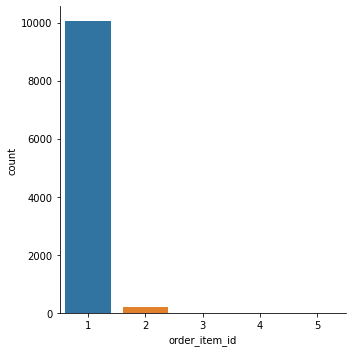

In [ ]:
sns.catplot(data=item_ordered, x="order_item_id", kind="count")

In [ ]:
#Mengetahui jumlah tipe produk yang dibeli dalam satu kali transaksi
product_ordered = Table_Consolidated3.groupby(by=["order_id"]).count()[["product_id"]].sort_values("product_id",ascending=False).reset_index()
product_ordered

,order_id,product_id
0,dab1208f2886c43e8bd155b40523d343,5
1,8272b63d03f5f79c56e9e4120aec44ef,4
2,895ab968e7bb0d5659d16cd74cd1650c,3
3,958c6a70e60365b576dd696ad29bbca2,3
4,3a1ce4053005d669ac4e0047a13573cf,3
...,...,...
10250,5528ba50898b536ac11c799ba9eef5ac,1
10251,552de4f2b6a656a62b913a24c76b82a7,1
10252,553901a853048dcd33ec8de19f90c5d0,1
10253,553a1f1b74cf15fe6cb4a01a627ab41f,1


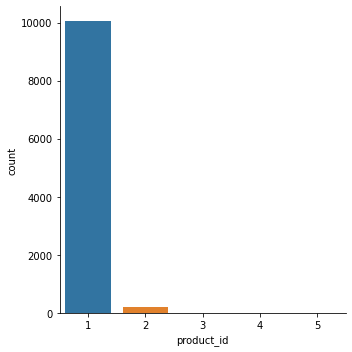

In [ ]:
sns.catplot(data=product_ordered, x="product_id", kind="count") 

In [ ]:
product_ordered.describe()

,product_id
count,10255.000000
mean,1.020965
std,0.155044
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,5.000000


 3. What product categories are most in demand?


In [ ]:
Top_Product = Table_Consolidated3.groupby(by=["product_category_name"]).count()[["order_id"]].sort_values(by="order_id", ascending=False).reset_index()
Top_Product.rename(columns={"order_id":"quantity_ordered"},inplace=True)
Top_ten_Products = Top_Product.head(10)
Top_ten_Products

,product_category_name,quantity_ordered
0,bed_bath_table,1072
1,health_beauty,933
2,sports_leisure,799
3,furniture_decor,794
4,computers_accessories,687
5,housewares,659
6,watches_gifts,510
7,telephony,451
8,garden_tools,436
9,toys,411


The following are the top 10 product categories which are the product categories most in demand by customers during 2016-2018. Where for the first position, namely the Bed Bath Table product category with a total purchase of 1,072 items.

In [ ]:
fig2 =px.bar(Top_ten_Products, x="quantity_ordered", y="product_category_name")
fig2.show()

 4. What payment methods are most used by customers?


In [ ]:
#Jenis payment yang paling banyak digunakan oleh customer
jenis_payment =Table_Consolidated3.groupby(by=["payment_type"]).count()[["customer_id"]].reset_index()
jenis_payment.rename(columns={"customer_id":"payment_type_count"},inplace=True)
jenis_payment

,payment_type,payment_type_count
0,boleto,2019
1,credit_card,7749
2,debit_card,157
3,voucher,545


Based on order data, most customers use credit cards as a means of payment. Of the total transaction data, 7,749 customers used credit cards, 2019 used boleto, 545 used vouchers, and only 157 used debit cards.

In [ ]:
px.bar(jenis_payment, x="payment_type", y="payment_type_count")

 5. Analyze the peak hours of online shopping

In [ ]:
#Menampilkan jumlah transaksi per jam , untuk mengetahaui jam berapa customer paling banyak melakukan transaksi
Table_Consolidated3["time_purchase"] = Table_Consolidated3["order_purchase_timestamp"].dt.hour
Table_Consolidated3
#Table_Consolidated3.drop(["transaction_hours","delivery_duration_estimated","delivery_duration_real"],axis=1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,order_item_id,...,customer_unique_id,zip_code,customer_city,customer_state,product_category_name,product_weight_g,geolocation_lat,geolocation_lng,date_purchase,time_purchase
0,432aaf21d85167c2c86ec9448c4e42cc,3df704f53d3f1d4818840b34ec672a9f,delivered,2018-03-01 14:14:28,2018-03-01 15:10:47,2018-03-02 21:09:20,2018-03-12 23:36:26,2018-03-21,72d3bf1d3a790f8874096fcf860e3eff,1.0,...,04cf8185c71090d28baa4407b2e6d600,5271,sao paulo,SP,toys,583.0,-23.638546,-46.793101,2018-03,14
1,91db217544d0eac98354b11f2f35abcb,c421c11493ae12b2aa0d0e455f015299,delivered,2018-04-29 22:10:21,2018-05-01 05:43:49,2018-05-04 13:17:00,2018-05-14 22:35:00,2018-05-22,6eb70dfb283dc3f645ed7b03c990dc72,1.0,...,15c9f1f3d32d5226f79571a100a8f7fe,5271,sao paulo,SP,audio,343.0,-23.638546,-46.793101,2018-04,22
2,046cb513a5ed6d4f7506af8f88636609,14ed9dcdbbcf33c3e561dfdd374373d8,delivered,2018-06-24 23:13:35,2018-06-24 23:34:10,2018-06-25 14:44:00,2018-06-28 18:42:02,2018-07-11,68ad45d48d69404aeb71ce87e1b2c948,1.0,...,88613309c9c1df2902d6778360d5f1d9,5271,sao paulo,SP,books_imported,850.0,-23.638546,-46.793101,2018-06,23
3,bdde0e6ab375f21ce8915c8b0c359f91,26478ee582f4b86952910fb4c7ee93b2,delivered,2018-08-06 09:54:22,2018-08-06 10:24:16,2018-08-06 13:12:00,2018-08-17 23:50:52,2018-08-27,72d3bf1d3a790f8874096fcf860e3eff,1.0,...,270f7bec71e8a56e5e9b8f402c1d35ec,60824,fortaleza,CE,toys,583.0,-6.111700,-38.206135,2018-08,9
4,03705afa0a4aabe1a734ddb11c1df3f0,e165d4c6a0d945a813e8a3bf42faa500,delivered,2017-09-27 08:42:08,2017-09-27 08:49:34,2017-09-29 19:55:50,2017-10-06 20:39:46,2017-10-26,b40ec43bdfc6d6fdd65e882066a5c895,4.0,...,4ef21f52dd7c061a646005b11918cbd3,60824,fortaleza,CE,computers_accessories,760.0,-6.111700,-38.206135,2017-09,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10465,2fe782855de414d2c2c51fcdb1437e3c,626a0f18050903535ecf8e312a5c028f,delivered,2018-08-01 07:13:41,2018-08-01 07:44:03,2018-08-03 04:29:00,2018-08-10 21:46:42,2018-08-23,e59f9160ef2e37fd48efdb84a4c30126,1.0,...,615eb18afcde37c5ed09c9d4109c41fa,56327,petrolina,PE,furniture_decor,1050.0,-8.036357,-34.934175,2018-08,7
10466,16fd9b360cbadca08b1026c8532820f5,04db47e1f5a9cfe6cc8b560696c807f1,delivered,2017-12-03 14:05:06,2017-12-03 14:13:33,2017-12-04 19:34:00,2017-12-05 18:04:43,2017-12-20,f74ed500ab93d12ce3fbc611474d89af,1.0,...,86ee190a174409391a427eed6f5e2728,2804,sao paulo,SP,stationery,1900.0,-23.551946,-46.595926,2017-12,14
10467,331027db835328af30e85ce6c7b55655,d90f5cda04cdb782cd4f07c76b1c1f0b,delivered,2018-02-05 13:02:20,2018-02-05 13:15:34,2018-02-07 15:59:32,2018-02-19 13:39:00,2018-03-06,9f94fe66050fae9e9351d5c83f4667c8,1.0,...,f92e20f93f305c5cb92806a59f6060f3,3575,sao paulo,SP,toys,500.0,-23.692816,-46.677841,2018-02,13
10468,e9f3ac5f695705ef6cd2678f8b7595e7,eac7448820de7d9ad1425dc2b33568e6,delivered,2018-01-27 19:00:21,2018-01-27 19:18:04,2018-01-29 23:36:56,2018-02-05 21:07:39,2018-02-20,fb4dc3571e0698692224020b5b1b672a,1.0,...,dc7bdea891acd8a05dcafa0062e23c9c,1252,sao paulo,SP,housewares,400.0,-23.564698,-46.652442,2018-01,19


In [ ]:
transaksi_per_jam = Table_Consolidated3.groupby(["time_purchase"]).nunique()[["order_id"]].sort_values("time_purchase", ascending=True).reset_index()
transaksi_per_jam.rename(columns={"order_id":"transaction_count"},inplace=True)
transaksi_per_jam

,time_purchase,transaction_count
0,0,261
1,1,122
2,2,61
3,3,25
4,4,25
5,5,19
6,6,43
7,7,122
8,8,302
9,9,505


In [ ]:
px.line(transaksi_per_jam, x="time_purchase", y="transaction_count")

By grouping customer transaction hours, it can help us to find out the optimal hours at which the most people make transactions/shopping. Based on existing transaction data, it was found that people made the most transactions, namely between 10-11 am, 3-4 pm, and 8 pm. 

6. Order Processing Duration

In [ ]:
#from datetime import timedelta

In [ ]:
#Menganalisis pengiriman
Table_Consolidated3["duration_delivery_estimated"] = (Table_Consolidated3["order_estimated_delivery_date"] - Table_Consolidated3["order_purchase_timestamp"]).dt.days
Table_Consolidated3["duration_delivery_real"] = (Table_Consolidated3["order_delivered_customer_date"] - Table_Consolidated3["order_purchase_timestamp"]).dt.days
Table_Consolidated3["difference_duration"] = Table_Consolidated3["duration_delivery_estimated"] - Table_Consolidated3["duration_delivery_real"]
Table_Consolidated3

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,order_item_id,...,customer_state,product_category_name,product_weight_g,geolocation_lat,geolocation_lng,date_purchase,time_purchase,duration_delivery_estimated,duration_delivery_real,difference_duration
0,432aaf21d85167c2c86ec9448c4e42cc,3df704f53d3f1d4818840b34ec672a9f,delivered,2018-03-01 14:14:28,2018-03-01 15:10:47,2018-03-02 21:09:20,2018-03-12 23:36:26,2018-03-21,72d3bf1d3a790f8874096fcf860e3eff,1.0,...,SP,toys,583.0,-23.638546,-46.793101,2018-03,14,19,11,8
1,91db217544d0eac98354b11f2f35abcb,c421c11493ae12b2aa0d0e455f015299,delivered,2018-04-29 22:10:21,2018-05-01 05:43:49,2018-05-04 13:17:00,2018-05-14 22:35:00,2018-05-22,6eb70dfb283dc3f645ed7b03c990dc72,1.0,...,SP,audio,343.0,-23.638546,-46.793101,2018-04,22,22,15,7
2,046cb513a5ed6d4f7506af8f88636609,14ed9dcdbbcf33c3e561dfdd374373d8,delivered,2018-06-24 23:13:35,2018-06-24 23:34:10,2018-06-25 14:44:00,2018-06-28 18:42:02,2018-07-11,68ad45d48d69404aeb71ce87e1b2c948,1.0,...,SP,books_imported,850.0,-23.638546,-46.793101,2018-06,23,16,3,13
3,bdde0e6ab375f21ce8915c8b0c359f91,26478ee582f4b86952910fb4c7ee93b2,delivered,2018-08-06 09:54:22,2018-08-06 10:24:16,2018-08-06 13:12:00,2018-08-17 23:50:52,2018-08-27,72d3bf1d3a790f8874096fcf860e3eff,1.0,...,CE,toys,583.0,-6.111700,-38.206135,2018-08,9,20,11,9
4,03705afa0a4aabe1a734ddb11c1df3f0,e165d4c6a0d945a813e8a3bf42faa500,delivered,2017-09-27 08:42:08,2017-09-27 08:49:34,2017-09-29 19:55:50,2017-10-06 20:39:46,2017-10-26,b40ec43bdfc6d6fdd65e882066a5c895,4.0,...,CE,computers_accessories,760.0,-6.111700,-38.206135,2017-09,8,28,9,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10465,2fe782855de414d2c2c51fcdb1437e3c,626a0f18050903535ecf8e312a5c028f,delivered,2018-08-01 07:13:41,2018-08-01 07:44:03,2018-08-03 04:29:00,2018-08-10 21:46:42,2018-08-23,e59f9160ef2e37fd48efdb84a4c30126,1.0,...,PE,furniture_decor,1050.0,-8.036357,-34.934175,2018-08,7,21,9,12
10466,16fd9b360cbadca08b1026c8532820f5,04db47e1f5a9cfe6cc8b560696c807f1,delivered,2017-12-03 14:05:06,2017-12-03 14:13:33,2017-12-04 19:34:00,2017-12-05 18:04:43,2017-12-20,f74ed500ab93d12ce3fbc611474d89af,1.0,...,SP,stationery,1900.0,-23.551946,-46.595926,2017-12,14,16,2,14
10467,331027db835328af30e85ce6c7b55655,d90f5cda04cdb782cd4f07c76b1c1f0b,delivered,2018-02-05 13:02:20,2018-02-05 13:15:34,2018-02-07 15:59:32,2018-02-19 13:39:00,2018-03-06,9f94fe66050fae9e9351d5c83f4667c8,1.0,...,SP,toys,500.0,-23.692816,-46.677841,2018-02,13,28,14,14
10468,e9f3ac5f695705ef6cd2678f8b7595e7,eac7448820de7d9ad1425dc2b33568e6,delivered,2018-01-27 19:00:21,2018-01-27 19:18:04,2018-01-29 23:36:56,2018-02-05 21:07:39,2018-02-20,fb4dc3571e0698692224020b5b1b672a,1.0,...,SP,housewares,400.0,-23.564698,-46.652442,2018-01,19,23,9,14


In [ ]:
kategori_delivery= []
for i in Table_Consolidated3["difference_duration"]:
  if i > 0:
    kategori_delivery.append("On Time")
  else:
    kategori_delivery.append("Late")

Table_Consolidated3["delivery_category"] = kategori_delivery
Table_Consolidated3

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,order_item_id,...,product_category_name,product_weight_g,geolocation_lat,geolocation_lng,date_purchase,time_purchase,duration_delivery_estimated,duration_delivery_real,difference_duration,delivery_category
0,432aaf21d85167c2c86ec9448c4e42cc,3df704f53d3f1d4818840b34ec672a9f,delivered,2018-03-01 14:14:28,2018-03-01 15:10:47,2018-03-02 21:09:20,2018-03-12 23:36:26,2018-03-21,72d3bf1d3a790f8874096fcf860e3eff,1.0,...,toys,583.0,-23.638546,-46.793101,2018-03,14,19,11,8,On Time
1,91db217544d0eac98354b11f2f35abcb,c421c11493ae12b2aa0d0e455f015299,delivered,2018-04-29 22:10:21,2018-05-01 05:43:49,2018-05-04 13:17:00,2018-05-14 22:35:00,2018-05-22,6eb70dfb283dc3f645ed7b03c990dc72,1.0,...,audio,343.0,-23.638546,-46.793101,2018-04,22,22,15,7,On Time
2,046cb513a5ed6d4f7506af8f88636609,14ed9dcdbbcf33c3e561dfdd374373d8,delivered,2018-06-24 23:13:35,2018-06-24 23:34:10,2018-06-25 14:44:00,2018-06-28 18:42:02,2018-07-11,68ad45d48d69404aeb71ce87e1b2c948,1.0,...,books_imported,850.0,-23.638546,-46.793101,2018-06,23,16,3,13,On Time
3,bdde0e6ab375f21ce8915c8b0c359f91,26478ee582f4b86952910fb4c7ee93b2,delivered,2018-08-06 09:54:22,2018-08-06 10:24:16,2018-08-06 13:12:00,2018-08-17 23:50:52,2018-08-27,72d3bf1d3a790f8874096fcf860e3eff,1.0,...,toys,583.0,-6.111700,-38.206135,2018-08,9,20,11,9,On Time
4,03705afa0a4aabe1a734ddb11c1df3f0,e165d4c6a0d945a813e8a3bf42faa500,delivered,2017-09-27 08:42:08,2017-09-27 08:49:34,2017-09-29 19:55:50,2017-10-06 20:39:46,2017-10-26,b40ec43bdfc6d6fdd65e882066a5c895,4.0,...,computers_accessories,760.0,-6.111700,-38.206135,2017-09,8,28,9,19,On Time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10465,2fe782855de414d2c2c51fcdb1437e3c,626a0f18050903535ecf8e312a5c028f,delivered,2018-08-01 07:13:41,2018-08-01 07:44:03,2018-08-03 04:29:00,2018-08-10 21:46:42,2018-08-23,e59f9160ef2e37fd48efdb84a4c30126,1.0,...,furniture_decor,1050.0,-8.036357,-34.934175,2018-08,7,21,9,12,On Time
10466,16fd9b360cbadca08b1026c8532820f5,04db47e1f5a9cfe6cc8b560696c807f1,delivered,2017-12-03 14:05:06,2017-12-03 14:13:33,2017-12-04 19:34:00,2017-12-05 18:04:43,2017-12-20,f74ed500ab93d12ce3fbc611474d89af,1.0,...,stationery,1900.0,-23.551946,-46.595926,2017-12,14,16,2,14,On Time
10467,331027db835328af30e85ce6c7b55655,d90f5cda04cdb782cd4f07c76b1c1f0b,delivered,2018-02-05 13:02:20,2018-02-05 13:15:34,2018-02-07 15:59:32,2018-02-19 13:39:00,2018-03-06,9f94fe66050fae9e9351d5c83f4667c8,1.0,...,toys,500.0,-23.692816,-46.677841,2018-02,13,28,14,14,On Time
10468,e9f3ac5f695705ef6cd2678f8b7595e7,eac7448820de7d9ad1425dc2b33568e6,delivered,2018-01-27 19:00:21,2018-01-27 19:18:04,2018-01-29 23:36:56,2018-02-05 21:07:39,2018-02-20,fb4dc3571e0698692224020b5b1b672a,1.0,...,housewares,400.0,-23.564698,-46.652442,2018-01,19,23,9,14,On Time


In [ ]:
delivery_satisfaction = Table_Consolidated3.groupby(by=["delivery_category"]).count()[["order_id"]].reset_index()
delivery_satisfaction

,delivery_category,order_id
0,Late,944
1,On Time,9526


In [ ]:
px.pie(delivery_satisfaction, values='order_id', names='delivery_category')

The graph above is the result of data processing to measure Olist Store quality service based on the length/duration of order processing. 90.98% of orders can be completed on time and do not exceed the estimated delivery time. However, there were still approximately 900 orders or 9.02% of the total orders where the order processing time exceeded the system's estimated limit, so it could be categorized as late for delivery.

In [ ]:
Late_Delivery = Table_Consolidated3.loc[Table_Consolidated3['delivery_category'] == 'Late']
Late_Delivery = Late_Delivery[["order_id","order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","duration_delivery_real"]]
Late_Delivery

,order_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,duration_delivery_real
21,8272b63d03f5f79c56e9e4120aec44ef,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,14
22,8272b63d03f5f79c56e9e4120aec44ef,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,14
23,8272b63d03f5f79c56e9e4120aec44ef,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,14
24,8272b63d03f5f79c56e9e4120aec44ef,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,14
44,a5474c0071dd5d1074e12d417078bbd0,2018-07-30 22:41:44,2018-08-01 02:50:15,2018-08-02 10:35:00,2018-08-03 19:28:47,3
...,...,...,...,...,...,...
10438,9bfcc088220bc74e76f4341292d16d76,2018-02-19 20:41:32,2018-02-20 07:27:05,2018-02-21 21:16:59,2018-03-07 01:04:20,15
10446,f7780ea2807db31691e83f0013294035,2018-07-30 15:22:15,2018-07-30 15:35:16,2018-07-30 15:00:00,2018-08-02 18:32:30,3
10460,fb662b5ba362e72d75d486ca4d29c9e4,2017-09-10 10:17:06,2017-09-10 10:30:25,2017-09-21 17:23:07,2017-10-13 17:25:01,33
10462,bd3a4f4d1e523b01043f634836a0b4c5,2017-11-24 23:59:48,2017-11-25 02:53:52,2017-11-28 00:04:34,2017-12-28 15:05:22,33


In [ ]:
Late_Delivery["wait_approval"] = (Late_Delivery["order_approved_at"] - Late_Delivery["order_purchase_timestamp"]).dt.days
Late_Delivery["wait_carrier"] = (Late_Delivery["order_delivered_carrier_date"] - Late_Delivery["order_approved_at"]).dt.days
Late_Delivery["wait_deliver"] = (Late_Delivery["order_delivered_customer_date"] - Late_Delivery["order_delivered_carrier_date"]).dt.days
Late_Delivery


,order_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,duration_delivery_real,wait_approval,wait_carrier,wait_deliver
21,8272b63d03f5f79c56e9e4120aec44ef,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,14,1,2,11
22,8272b63d03f5f79c56e9e4120aec44ef,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,14,1,2,11
23,8272b63d03f5f79c56e9e4120aec44ef,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,14,1,2,11
24,8272b63d03f5f79c56e9e4120aec44ef,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,14,1,2,11
44,a5474c0071dd5d1074e12d417078bbd0,2018-07-30 22:41:44,2018-08-01 02:50:15,2018-08-02 10:35:00,2018-08-03 19:28:47,3,1,1,1
...,...,...,...,...,...,...,...,...,...
10438,9bfcc088220bc74e76f4341292d16d76,2018-02-19 20:41:32,2018-02-20 07:27:05,2018-02-21 21:16:59,2018-03-07 01:04:20,15,0,1,13
10446,f7780ea2807db31691e83f0013294035,2018-07-30 15:22:15,2018-07-30 15:35:16,2018-07-30 15:00:00,2018-08-02 18:32:30,3,0,-1,3
10460,fb662b5ba362e72d75d486ca4d29c9e4,2017-09-10 10:17:06,2017-09-10 10:30:25,2017-09-21 17:23:07,2017-10-13 17:25:01,33,0,11,22
10462,bd3a4f4d1e523b01043f634836a0b4c5,2017-11-24 23:59:48,2017-11-25 02:53:52,2017-11-28 00:04:34,2017-12-28 15:05:22,33,0,2,30


In [ ]:
a = Late_Delivery["wait_approval"].mean()
b = Late_Delivery["wait_carrier"].mean()
c = Late_Delivery["wait_deliver"].mean()

print("Rata-rata waktu tunggu approval: ", a)
print("Rata-rata waktu tunggu dikirim ke jasa kurir: ", b)
print("Rata-rata waktu tunggu untuk siap dikirim oleh jasa kurir: ", c)

Rata-rata waktu tunggu approval:  0.3379237288135593
Rata-rata waktu tunggu dikirim ke jasa kurir:  4.799788135593221
Rata-rata waktu tunggu untuk siap dikirim oleh jasa kurir:  24.22457627118644


Based on the order processing time interval from the time of approval until the order is ready to be sent, the largest average idle time is when the order is at the courier service for delivery with an average waiting time of 24 days

In [ ]:
path_export ="/content/gdrive/MyDrive/Data Analyst/Capstone Project /Data/"

In [ ]:
Table_Consolidated3.to_csv(path_export + "OlistStore_Clean.csv")

In [ ]:
Table_Consolidated3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10470 entries, 0 to 10469
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       10470 non-null  object        
 1   customer_id                    10470 non-null  object        
 2   order_status                   10470 non-null  object        
 3   order_purchase_timestamp       10470 non-null  datetime64[ns]
 4   order_approved_at              10470 non-null  datetime64[ns]
 5   order_delivered_carrier_date   10470 non-null  datetime64[ns]
 6   order_delivered_customer_date  10470 non-null  datetime64[ns]
 7   order_estimated_delivery_date  10470 non-null  datetime64[ns]
 8   product_id                     10470 non-null  object        
 9   order_item_id                  10470 non-null  object        
 10  payment_type                   10470 non-null  object        
 11  customer_unique

## 8. Rekomendasi



1. After looking at the overall customer habits, the things that can be done to increase transactions at the Olist Store are
* You can provide attractive offers for products that are included in the Top 10 Product Category,
* Carry out partnership activities with credit card service providers to also be able to offer promos, discounts, cashback, to attract customers to shop
* Implementing a tiered member system, where each member level offers different benefits to customers. Where this member system is determined by the number of transactions that have been made

(Every promotion, discount, etc. can be done during busy shopping hours, namely 10-11 am, 3-4 pm, and 8 pm, so that the impact of the promo is more optimal)

2. To improve delivery services at the Olist Store, the Olist Store can coordinate further with delivery service partners so they can improve their delivery system, so that orders don't take too long to be sent.





